In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Engg_College_Data.csv') 

In [3]:
df.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5


In [4]:
df.shape

(26, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SR_NO           26 non-null     int64 
 1   Engg_College    26 non-null     object
 2   Teaching        26 non-null     int64 
 3   Fees            26 non-null     int64 
 4   Placements      26 non-null     int64 
 5   Internship      26 non-null     int64 
 6   Infrastructure  26 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.6+ KB


In [6]:
df.Engg_College.nunique()

26

In [7]:
df.Engg_College.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SR_NO,26.0,13.500000,7.648529,1.0,7.25,13.5,19.75,26.0
Teaching,26.0,2.807692,1.132051,1.0,2.00,3.0,3.00,5.0
Fees,26.0,3.576923,1.331858,1.0,2.25,4.0,5.00,5.0
Placements,26.0,2.884615,1.531716,1.0,1.25,3.0,4.00,5.0
Internship,26.0,2.769231,1.242826,1.0,2.00,2.0,4.00,5.0
Infrastructure,26.0,3.384615,1.298520,1.0,3.00,3.0,4.75,5.0


# Removing the SR_NO column and storing the result in new object enggdata

In [9]:
engg_data=df.drop(['SR_NO'],axis=1)

In [10]:
engg_data

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,A,5,2,5,5,3
1,B,4,2,5,5,3
2,C,4,5,5,4,5
3,D,5,4,5,4,4
4,E,2,5,2,2,5
5,F,3,4,3,3,4
6,G,1,3,1,1,2
7,H,4,4,5,5,5
8,I,4,4,4,4,4
9,J,3,4,3,4,5


In [11]:
engg_data.iloc[:,1:6]

,Teaching,Fees,Placements,Internship,Infrastructure
0,5,2,5,5,3
1,4,2,5,5,3
2,4,5,5,4,5
3,5,4,5,4,4
4,2,5,2,2,5
5,3,4,3,3,4
6,1,3,1,1,2
7,4,4,5,5,5
8,4,4,4,4,4
9,3,4,3,4,5


# Creating the Dendrogram
### Importing dendrogram and linkage module

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Choosing average linkage method

In [14]:
link_method = linkage(engg_data.iloc[:,1:6], method = 'average')

In [15]:
labelList = np.array(engg_data.Engg_College)
labelList

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

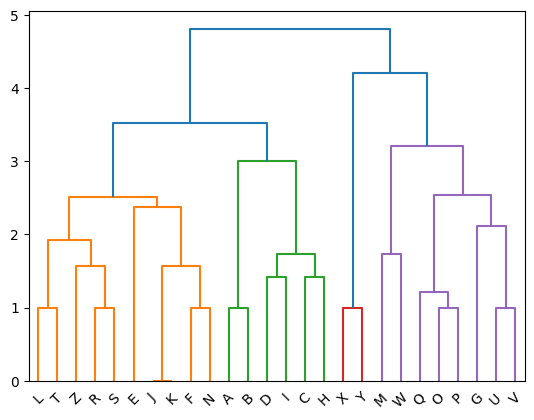

In [16]:
dend = dendrogram(link_method,labels = labelList)

### Cutting the Dendrogram with suitable clusters

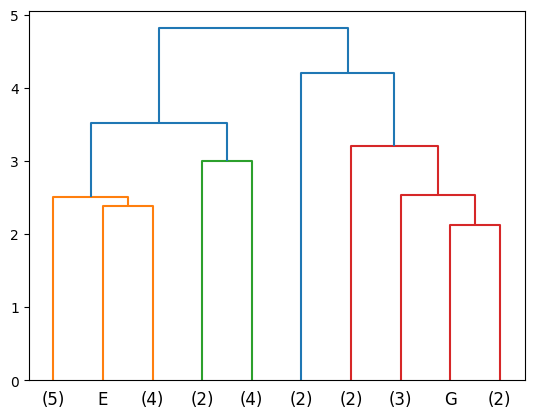

In [17]:
# visualization only the top 10 clusters:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10,
                 labels = labelList 
                 )

# Importing fcluster module to create clusters

In [21]:
from scipy.cluster.hierarchy import fcluster

In [22]:
# Set criterion as maxclust,then create 3 clusters, 
# and store the result in another object 'clusters'

clusters = fcluster(link_method, 3, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3,
       3, 2, 2, 1], dtype=int32)

Appending clusters to original dataset

In [23]:
df['clusters'] = clusters

In [25]:
df.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,clusters
0,1,A,5,2,5,5,3,1
1,2,B,4,2,5,5,3,1
2,3,C,4,5,5,4,5,1
3,4,D,5,4,5,4,4,1
4,5,E,2,5,2,2,5,1


### Cluster Frequency

In [26]:
# number of colleges in each clusters:
df.clusters.value_counts().sort_index()

clusters
1    16
2     2
3     8
Name: count, dtype: int64

# Cluster Profiles

In [27]:
df.iloc[:,2:8]

,Teaching,Fees,Placements,Internship,Infrastructure,clusters
0,5,2,5,5,3,1
1,4,2,5,5,3,1
2,4,5,5,4,5,1
3,5,4,5,4,4,1
4,2,5,2,2,5,1
5,3,4,3,3,4,1
6,1,3,1,1,2,3
7,4,4,5,5,5,1
8,4,4,4,4,4,1
9,3,4,3,4,5,1


In [28]:
aggdata=df.iloc[:,2:8].groupby('clusters').mean()
aggdata['Freq']=df.clusters.value_counts().sort_index()
aggdata

,Teaching,Fees,Placements,Internship,Infrastructure,Freq
clusters,,,,,,
1,3.375,4.125,3.875,3.4375,3.875,16
2,1.000,1.000,1.000,1.5000,5.000,2
3,2.125,3.125,1.375,1.7500,2.000,8


- Cluster 1: Tier 1 colleges (Top Colleges)
- Cluster 2: Tier 3 colleges (Poor performing colleges/new college)
- Cluster 3: Tier 2 colleges (Medium performing colleges)

In [29]:
# Using Agglomerative Clustering

In [30]:
from sklearn.cluster import AgglomerativeClustering

In [31]:
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', 
                                  linkage='average')
Cluster_agglo=cluster.fit_predict(engg_data.iloc[:,1:6])
print(Cluster_agglo)

[0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 2 2 0]


In [32]:
# Add a new column to the dataset with cluster label
df["Agglo_CLusters"]=Cluster_agglo

In [33]:
df.columns

Index(['SR_NO', 'Engg_College', 'Teaching', 'Fees', 'Placements', 'Internship',
       'Infrastructure', 'clusters', 'Agglo_CLusters'],
      dtype='object')

In [35]:
agglo_data=df.drop(["SR_NO","clusters","Engg_College"],axis=1).groupby('Agglo_CLusters').mean()
agglo_data['Freq']=df.Agglo_CLusters.value_counts().sort_index()
agglo_data

,Teaching,Fees,Placements,Internship,Infrastructure,Freq
Agglo_CLusters,,,,,,
0,3.375,4.125,3.875,3.4375,3.875,16
1,2.125,3.125,1.375,1.7500,2.000,8
2,1.000,1.000,1.000,1.5000,5.000,2


# Recommendations
1. For companies hiring, go to colleges for Placements are Tier 1 colleges, followed by Tier 2 colleges
2. For companies providing Training program to staffs and students, go to colleges are Tier 2 and Tier 3 Colleges, since Tier 1 is comparitively performing better.
3. Tier 3 colleges will need to concentrate more on Marketing and Advertisements about their campus to create awareness and attract students
4. Students looking to enroll in a college, can give priority to Tier 1 over Tier 2 and 3 colleges 

# Saving the Cluster Profiles in a csv file

In [36]:
aggdata.to_csv('enggdata_hc.csv')

In [37]:
import os
os.getcwd()

'C:\\Users\\Abdul Razak'